# Logistic Regression
# defination: Logistic Regression is a supervised machine learning classification algorithm used to predict binary outcomes (only two classes such as Yes/No, Pass/Fail, Spam/Not Spam).

It does not predict continuous values

It predicts probability between 0 and 1

Uses the sigmoid function to make decisions

# 1.load the telecom dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
data=pd.read_csv("telecom_data.csv")
print(data.sample(10))

     Age  Gender  PlanType  MonthlyUsage Churn
98    35  Female     Ultra            26    No
138   21  Female   Regular            15    No
0     21  Female   Regular            15    No
60    34    Male     Ultra            37    No
144   42  Female  Advanced            52    No
59    20  Female     Ultra            57   Yes
26    31  Female  Advanced            32    No
131   32  Female   Economy            59    No
14    26    Male  Advanced            23    No
114   31  Female   Economy            23   Yes


# 2.data inspection

In [4]:
data.shape # shape of dataset

(150, 5)

In [5]:
data.isnull().sum() # to see the missing values

Age             0
Gender          0
PlanType        0
MonthlyUsage    0
Churn           0
dtype: int64

In [6]:
data.describe() # dataset Description

,Age,MonthlyUsage
count,150.000000,150.000000
mean,35.193333,33.693333
std,10.841566,15.923031
min,19.000000,3.000000
25%,25.000000,23.000000
50%,35.000000,35.000000
75%,44.000000,50.000000
max,54.000000,59.000000


In [8]:
# to see BAIS in GENDER COLUMN
print(data["Gender"].value_counts(normalize=True))
print(data["Gender"].value_counts(normalize=False))

Gender
Female    0.793333
Male      0.206667
Name: proportion, dtype: float64
Gender
Female    119
Male       31
Name: count, dtype: int64


In [10]:
# TO SEE THE BAIS CHURN COLUMN
print(data["Churn"].value_counts(normalize=True))
print(data["Churn"].value_counts(normalize=True))

Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64
Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64


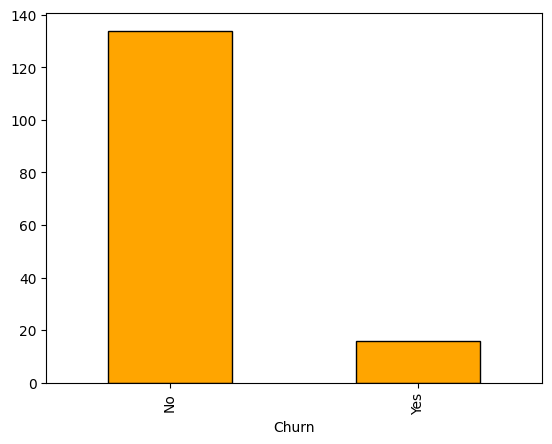

In [26]:
data['Churn'].value_counts().plot(kind='bar',color="orange",edgecolor="black")
plt.show()

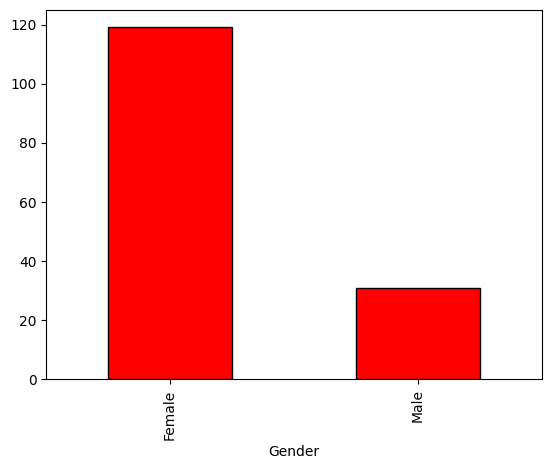

In [25]:
data["Gender"].value_counts().plot(kind="bar",color="red",edgecolor="black")
plt.show()

In [31]:
# SEPARETE CATEGORICAL AND NUMERICAL
fdata=data.drop(columns=["Churn"])
X = fdata
y = data["Churn"].map({"Yes":1,"No":0})
categorical = fdata.select_dtypes(include = "object").columns
numerical = fdata.select_dtypes(include = "int64").columns
print("Categorical feature:",list(categorical))
print("numerical feature:", list(numerical))

Categorical feature: ['Gender', 'PlanType']
numerical feature: ['Age', 'MonthlyUsage']


# 3.Feature engineering

This step transforms categorical variables into numerical dummy variables so that machine learning models can process the data efficiently.

In [33]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
X_encoded_gd = pd.get_dummies(
    X,
    columns = categorical,
    drop_first = True)
print("gd:",X_encoded_gd.columns.tolist())

gd: ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']


In [35]:
print(X_encoded_gd["PlanType_Economy"].sample(10))

128    False
105    False
45     False
147    False
74     False
104    False
67      True
72     False
140    False
98     False
Name: PlanType_Economy, dtype: bool


This step converts categorical variables into one-hot encoded numerical features and merges them with numerical data to prepare the dataset for machine learning models.

In [38]:
ohe = OneHotEncoder(
    drop = 'first',
    sparse_output = False
)
encoded_array = ohe.fit_transform(X[categorical])

encoded_df = pd.DataFrame(
    encoded_array,
    columns = ohe.get_feature_names_out(categorical)
)
print(encoded_array)
X_encoded_ohe = pd.concat(
    [X[num].reset_index(drop=True),encoded_df.reset_index(drop=True)],
    axis = 1
)
print("One hot encoding columns:",X_encoded_ohe.columns.tolist())

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0.

NameError: name 'num' is not defined

In [40]:
scaler = StandardScaler()
X_scaled_gd = X_encoded_gd.copy()
X_scaled_gd[numerical] = scaler.fit_transform(X_scaled_gd[numerical])
X_scaled_ohe = X_encoded_gd.copy()
X_scaled_ohe[numerical] = scaler.fit_transform(X_scaled_ohe[numerical])
data1 = pd.DataFrame({
    'Age_ohe':X_scaled_ohe[numerical]['Age'],
    'Age_gd':X_scaled_gd[numerical]['Age'],
    'MonthlyUsage_ohe':X_scaled_ohe[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd':X_scaled_gd[numerical]['MonthlyUsage']
})
print(data1)

      Age_ohe    Age_gd  MonthlyUsage_ohe  MonthlyUsage_gd
0   -1.313545 -1.313545         -1.177914        -1.177914
1    0.907574  0.907574          0.460411         0.460411
2    0.815027  0.815027          0.397399         0.397399
3   -0.388079 -0.388079         -0.673814        -0.673814
4   -0.202986 -0.202986         -1.366951        -1.366951
..        ...       ...               ...              ...
145 -1.498638 -1.498638         -1.934064        -1.934064
146  0.629934  0.629934          1.153549         1.153549
147  1.740493  1.740493         -1.682014        -1.682014
148 -1.406091 -1.406091          1.468612         1.468612
149 -0.388079 -0.388079         -0.673814        -0.673814

[150 rows x 4 columns]
